In [1]:
#import the necessary libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [7]:
#  load the dataset

In [8]:
dataset=pd.read_csv('./THRISSUR CAAQMS MONTHLY DATA - APRIL 2024.csv')

In [9]:
dataset

,PARAMETERS,PM10,PM25,SO2,CO,NO,NO2,NOX,NH3,O3,...,ETHYL,MP,OXY,WS,WD,TC,RH,SR,RG,AQI
0,1/4/2024,64.18,28.50,3.08,0.39,2.75,5.96,7.41,1.99,29.60,...,0,0,0,1.80,251.17,30.62,69.74,NaN,0,64
1,2/4/2024,64.49,28.63,4.09,0.28,2.77,5.89,7.48,1.99,29.75,...,0,0,0,1.97,251.14,30.85,70.77,NaN,0,64
2,3/4/2024,63.81,28.33,4.26,0.30,2.72,5.84,7.38,1.98,29.43,...,0,0,0,2.31,249.89,30.86,72.70,NaN,0,64
3,4/4/2024,64.10,28.46,6.42,0.37,2.74,5.89,7.43,1.99,29.56,...,0,0,0,2.05,248.35,31.31,72.29,NaN,0,64
4,5/4/2024,64.58,28.67,1.79,0.28,2.77,5.89,7.47,2,29.79,...,0,0,0,2.11,248.87,31.09,69.29,NaN,0,65
5,6/4/2024,64.56,28.67,3.27,0.32,2.77,5.89,7.37,1.99,29.78,...,0,0,0,1.76,249.19,31.36,70.90,NaN,0,65
6,7/4/2024,64.30,28.55,4.32,0.29,2.75,5.95,7.37,1.99,29.66,...,0,0,0,2.01,249.17,31.29,72.46,NaN,0,64
7,8/4/2024,63.67,28.27,4.89,0.29,2.72,5.89,7.48,1.97,29.36,...,0,0,0,1.91,249.18,31.37,72.73,NaN,0,64
8,9/4/2024,63.77,28.32,1.99,0.34,2.72,5.87,7.51,2.02,29.41,...,0,0,0,1.83,249.47,31.41,72.24,NaN,0,64
9,10/4/2024,64.29,28.55,4.70,0.34,2.75,5.87,7.45,1.97,29.65,...,0,0,0,1.77,249.88,32.05,66.78,NaN,0,64


In [10]:
dataset.describe()

,PM10,PM25,SO2,CO,NO,NOX,O3,BEN,ETHYL,MP,OXY,WS,WD,TC,RH,SR,RG,AQI
count,25.000000,25.00000,25.00000,25.000000,25.000000,25.000000,25.0000,25.00,25.0,25.0,25.0,25.000000,25.000000,25.00000,25.00000,0.0,25.0,25.000000
mean,64.254000,28.52880,2.17480,0.359200,2.750800,7.421600,29.6368,0.96,0.0,0.0,0.0,1.929600,249.556400,31.21280,71.51520,NaN,0.0,64.320000
std,0.328329,0.14521,2.02854,0.113649,0.020801,0.057131,0.1551,0.00,0.0,0.0,0.0,0.170134,0.957039,0.41277,2.29927,NaN,0.0,0.476095
min,63.670000,28.27000,0.08000,0.270000,2.720000,7.320000,29.3600,0.96,0.0,0.0,0.0,1.660000,248.320000,30.30000,65.34000,NaN,0.0,64.000000
25%,63.960000,28.40000,0.39000,0.280000,2.730000,7.380000,29.5000,0.96,0.0,0.0,0.0,1.790000,248.870000,30.95000,70.81000,NaN,0.0,64.000000
50%,64.300000,28.55000,1.04000,0.300000,2.750000,7.410000,29.6500,0.96,0.0,0.0,0.0,1.900000,249.190000,31.29000,72.24000,NaN,0.0,64.000000
75%,64.550000,28.66000,4.26000,0.390000,2.770000,7.470000,29.7800,0.96,0.0,0.0,0.0,2.060000,250.260000,31.41000,72.73000,NaN,0.0,65.000000
max,64.680000,28.72000,6.42000,0.680000,2.780000,7.520000,29.8400,0.96,0.0,0.0,0.0,2.310000,251.320000,32.05000,74.33000,NaN,0.0,65.000000


In [11]:
dataset.shape

(25, 22)

In [12]:
dataset.columns

Index(['PARAMETERS', ' PM10', ' PM25', ' SO2', ' CO', ' NO', ' NO2', ' NOX',
       ' NH3 ', ' O3', ' BEN', ' TOLU', ' ETHYL', ' MP', ' OXY', ' WS', ' WD',
       ' TC', ' RH', ' SR', ' RG', 'AQI'],
      dtype='object')

In [13]:
# checking and deleting null values

In [14]:
dataset.isnull().sum()

PARAMETERS     0
 PM10          0
 PM25          0
 SO2           0
 CO            0
 NO            0
 NO2           0
 NOX           0
 NH3           0
 O3            0
 BEN           0
 TOLU          0
 ETHYL         0
 MP            0
 OXY           0
 WS            0
 WD            0
 TC            0
 RH            0
 SR           25
 RG            0
AQI            0
dtype: int64

In [15]:
dataset.drop(columns=[' SR'],inplace=True)

In [16]:
dataset.isnull().sum()

PARAMETERS    0
 PM10         0
 PM25         0
 SO2          0
 CO           0
 NO           0
 NO2          0
 NOX          0
 NH3          0
 O3           0
 BEN          0
 TOLU         0
 ETHYL        0
 MP           0
 OXY          0
 WS           0
 WD           0
 TC           0
 RH           0
 RG           0
AQI           0
dtype: int64

In [17]:
# check for duplicate rows

In [18]:
dataset.duplicated().sum()

0

In [19]:
dataset.shape

(25, 21)

In [20]:
# drop the less important parameters for calculating AQI

In [21]:
dataset.drop(columns=['PARAMETERS',' BEN', ' TOLU', ' ETHYL', ' MP', ' OXY', ' WS', ' WD',' TC', ' RH', ' RG'],inplace=True)

In [22]:
dataset

,PM10,PM25,SO2,CO,NO,NO2,NOX,NH3,O3,AQI
0,64.18,28.50,3.08,0.39,2.75,5.96,7.41,1.99,29.60,64
1,64.49,28.63,4.09,0.28,2.77,5.89,7.48,1.99,29.75,64
2,63.81,28.33,4.26,0.30,2.72,5.84,7.38,1.98,29.43,64
3,64.10,28.46,6.42,0.37,2.74,5.89,7.43,1.99,29.56,64
4,64.58,28.67,1.79,0.28,2.77,5.89,7.47,2,29.79,65
5,64.56,28.67,3.27,0.32,2.77,5.89,7.37,1.99,29.78,65
6,64.30,28.55,4.32,0.29,2.75,5.95,7.37,1.99,29.66,64
7,63.67,28.27,4.89,0.29,2.72,5.89,7.48,1.97,29.36,64
8,63.77,28.32,1.99,0.34,2.72,5.87,7.51,2.02,29.41,64
9,64.29,28.55,4.70,0.34,2.75,5.87,7.45,1.97,29.65,64


In [23]:
dataset.shape

(25, 10)

In [24]:
dataset.dtypes

 PM10    float64
 PM25    float64
 SO2     float64
 CO      float64
 NO      float64
 NO2      object
 NOX     float64
 NH3      object
 O3      float64
AQI        int64
dtype: object

In [28]:
#converting categorical features directly into numerical using 'factorize'

In [29]:
dataset[' NO2'], _ = pd.factorize(dataset[' NO2'])
dataset[' NH3 '], _ = pd.factorize(dataset[' NH3 '])


In [30]:
dataset.dtypes

 PM10    float64
 PM25    float64
 SO2     float64
 CO      float64
 NO      float64
 NO2       int64
 NOX     float64
 NH3       int64
 O3      float64
AQI        int64
dtype: object

In [31]:
dataset.describe()

,PM10,PM25,SO2,CO,NO,NO2,NOX,NH3,O3,AQI
count,25.000000,25.00000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0000,25.000000
mean,64.254000,28.52880,2.17480,0.359200,2.750800,5.400000,7.421600,1.760000,29.6368,64.320000
std,0.328329,0.14521,2.02854,0.113649,0.020801,3.851407,0.057131,1.942507,0.1551,0.476095
min,63.670000,28.27000,0.08000,0.270000,2.720000,0.000000,7.320000,0.000000,29.3600,64.000000
25%,63.960000,28.40000,0.39000,0.280000,2.730000,1.000000,7.380000,0.000000,29.5000,64.000000
50%,64.300000,28.55000,1.04000,0.300000,2.750000,5.000000,7.410000,1.000000,29.6500,64.000000
75%,64.550000,28.66000,4.26000,0.390000,2.770000,9.000000,7.470000,3.000000,29.7800,65.000000
max,64.680000,28.72000,6.42000,0.680000,2.780000,12.000000,7.520000,6.000000,29.8400,65.000000


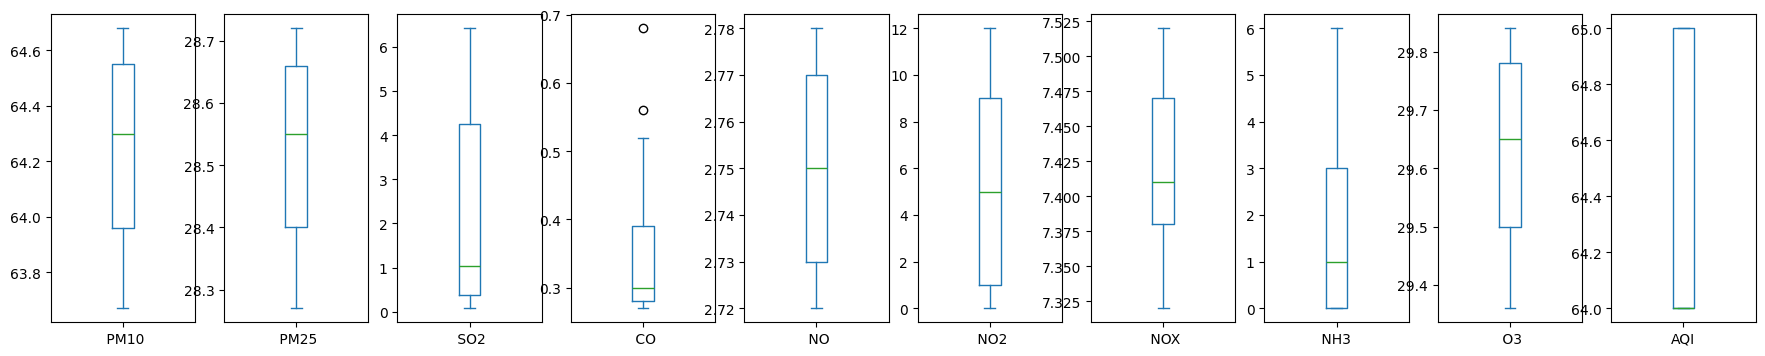

In [32]:
dataset.plot.box(figsize=(22,4),subplots=True);

In [33]:
 #Feature scaling 

In [34]:
Scale=StandardScaler()

In [35]:
X=[' PM10', ' PM25', ' SO2', ' CO', ' NO', ' NO2', ' NOX',' NH3 ',' O3']
dataset[X]=Scale.fit_transform(dataset[X])


In [36]:
dataset.sample(6)

,PM10,PM25,SO2,CO,NO,NO2,NOX,NH3,O3,AQI
3,-0.478714,-0.483566,2.135890,0.096989,-0.529921,-1.165998,0.150061,-0.924729,-0.505375,64
6,0.142992,0.149006,1.079316,-0.621450,-0.039253,-0.635999,-0.921805,-0.924729,0.152665,64
18,0.671442,0.711292,-0.913081,-0.801060,0.451414,0.953998,-0.207227,0.126099,0.679098,64
15,-0.944993,-0.905280,-0.807424,-0.801060,-1.020589,0.688999,1.579216,2.227756,-0.900200,64
12,-1.504528,-1.467566,-0.570953,-0.801060,-1.511257,-1.165998,-0.207227,1.176928,-1.492436,64
17,1.293148,1.273578,-0.621266,-0.801060,1.432750,1.218998,-0.743161,-0.924729,1.271334,65


In [37]:
dataset.describe()

,PM10,PM25,SO2,CO,NO,NO2,NOX,NH3,O3,AQI
count,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,25.000000
mean,3.088196e-14,-3.024248e-15,4.884981e-17,-5.773160e-17,5.249134e-15,-1.154632e-16,-1.142642e-14,-4.440892e-18,1.591616e-14,64.320000
std,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,0.476095
min,-1.815381e+00,-1.818995e+00,-1.053958e+00,-8.010603e-01,-1.511257e+00,-1.430997e+00,-1.815027e+00,-9.247290e-01,-1.821456e+00,64.000000
25%,-9.139077e-01,-9.052805e-01,-8.979875e-01,-7.112554e-01,-1.020589e+00,-1.165998e+00,-7.431605e-01,-9.247290e-01,-9.001995e-01,64.000000
50%,1.429924e-01,1.490058e-01,-5.709526e-01,-5.316454e-01,-3.925343e-02,-1.059998e-01,-2.072275e-01,-3.993148e-01,8.686136e-02,64.000000
75%,9.201248e-01,9.221490e-01,1.049128e+00,2.765993e-01,9.420824e-01,9.539981e-01,8.646387e-01,6.515136e-01,9.423141e-01,65.000000
max,1.324234e+00,1.343864e+00,2.135890e+00,2.880943e+00,1.432750e+00,1.748997e+00,1.757860e+00,2.227756e+00,1.337138e+00,65.000000


<Axes: >

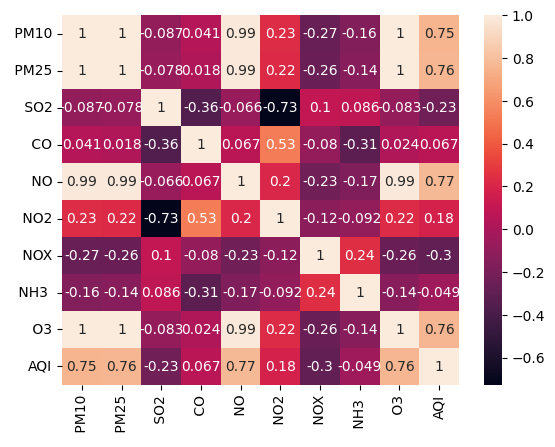

In [38]:
sns.heatmap(dataset.corr(),annot=True)

In [39]:
dataset.shape

(25, 10)

In [40]:
# splitting dataframe into features and labels

In [41]:
feature_label=[' PM10', ' PM25', ' SO2', ' CO', ' NO', ' NO2', ' NOX',
       ' NH3 ', ' O3']

In [42]:
x=dataset[feature_label].values

In [44]:
y=dataset['AQI'].values

In [45]:
# splitting the dataframe into training and testing sets

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [47]:
#initialize the regression model

In [48]:
linear=LinearRegression()
knn = KNeighborsRegressor(n_neighbors=5)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
svr = SVR(kernel='rbf')


In [49]:
#train the models

In [50]:
linear.fit(x_train,y_train)
knn.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
svr.fit(x_train,y_train)

SVR()

In [51]:
# predicting the output of Linear Regressor and checking accuracy

In [52]:
y_pred=linear.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error of Linear Regressor is",mse)
r2 = r2_score(y_test, y_pred)
print("R2 Square of Linear Regressor is",r2)

Mean Squared Error of Linear Regressor is 0.10594803764611278
R2 Square of Linear Regressor is 0.5585498431411967


In [53]:
# predicting the output of KNN Regressor and checking accuracy

In [54]:
y_pred=knn.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error of KNN Regressor is",mse)
r2 = r2_score(y_test, y_pred)
print("R2 Square of KNN Regressor is",r2)

Mean Squared Error of KNN Regressor is 0.1519999999999975
R2 Square of KNN Regressor is 0.36666666666667713


In [55]:
# predicting the output of Decision Tree Regressor and checking accuracy

In [56]:
y_pred=dt.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error of  Decision Tree Regressor is",mse)
r2 = r2_score(y_test, y_pred)
print("R2 Square of  Decision Tree Regressor is",r2)

Mean Squared Error of  Decision Tree Regressor is 0.0
R2 Square of  Decision Tree Regressor is 1.0


In [57]:
# predicting the output of Random Forest Regressor and checking accuracy

In [58]:
y_pred=rf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error of Random Forest Regressor is",mse)
r2 = r2_score(y_test, y_pred)
print("R2 Square of Random Forest Regressor is",r2)

Mean Squared Error of Random Forest Regressor is 7.999999999996817e-05
R2 Square of Random Forest Regressor is 0.9996666666666668


In [59]:
# predicting the output of SVM Regressor and checking accuracy

In [60]:
y_pred=svr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error of SVM Regressor is",mse)
r2 = r2_score(y_test, y_pred)
print("R2 Square of SVM Regressor is",r2)

Mean Squared Error of SVM Regressor is 0.06038800217843125
R2 Square of SVM Regressor is 0.7483833242565364


In [61]:
# testing the models with sample input

In [62]:
linear.predict([[0.857954,0.851863,-0.897987,2.880943,0.942082,1.748997,-0.385872,-0.399315,0.876510]])

array([64.81711948])

In [63]:
knn.predict([[0.857954,0.851863,-0.897987,2.880943,0.942082,1.748997,-0.385872,-0.399315,0.876510]])

array([64.6])

In [64]:
dt.predict([[0.857954,0.851863,-0.897987,2.880943,0.942082,1.748997,-0.385872,-0.399315,0.876510]])

array([65.])

In [65]:
rf.predict([[0.857954,0.851863,-0.897987,2.880943,0.942082,1.748997,-0.385872,-0.399315,0.876510]])

array([64.89])

In [66]:
svr.predict([[0.857954,0.851863,-0.897987,2.880943,0.942082,1.748997,-0.385872,-0.399315,0.876510]])

array([64.8997219])

#### CONCLUSION: Decision Tree Regressor  shows the most accuracy.